In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Load the dataset
df = pd.read_csv("/content/task1.csv")


In [ ]:
# Data Exploration
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334389 entries, 0 to 334388
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   brokered_by     333887 non-null  float64
 1   status          334389 non-null  object 
 2   price           334055 non-null  float64
 3   bed             251245 non-null  float64
 4   bath            247691 non-null  float64
 5   acre_lot        270163 non-null  float64
 6   street          333021 non-null  float64
 7   city            334336 non-null  object 
 8   state           334388 non-null  object 
 9   zip_code        334325 non-null  float64
 10  house_size      216988 non-null  float64
 11  prev_sold_date  158327 non-null  object 
dtypes: float64(8), object(4)
memory usage: 30.6+ MB
None


In [ ]:
# Data Exploration
print(df.describe())


         brokered_by         price            bed           bath  \
count  333887.000000  3.340550e+05  251245.000000  247691.000000   
mean    50864.812029  6.105616e+05       3.368222       2.568971   
std     30465.890669  4.307097e+06       1.620503       1.522216   
min         1.000000  0.000000e+00       1.000000       1.000000   
25%     22916.000000  1.550000e+05       3.000000       2.000000   
50%     51498.000000  3.299000e+05       3.000000       2.000000   
75%     78397.000000  5.990000e+05       4.000000       3.000000   
max    110141.000000  2.147484e+09     142.000000     198.000000   

            acre_lot        street       zip_code    house_size  
count  270163.000000  3.330210e+05  334325.000000  2.169880e+05  
mean       16.792623  1.036503e+06   17033.629364  2.181925e+03  
std       821.457837  6.003537e+05    8659.211491  5.267959e+03  
min         0.000000  4.000000e+00       0.000000  4.000000e+00  
25%         0.150000  5.240730e+05   10028.000000  1.2750

In [ ]:
# Data Exploration
print(df.isnull().sum().sort_values(ascending=False).iloc[:20])

prev_sold_date    176062
house_size        117401
bath               86698
bed                83144
acre_lot           64226
street              1368
brokered_by          502
price                334
zip_code              64
city                  53
state                  1
status                 0
dtype: int64


In [ ]:


# Check for missing values
print(df.isnull().sum())

# Drop rows with missing target values (price)
df = df.dropna(subset=['price'])

# Impute missing values in features with mean (you can choose other strategies like median, mode, or use more complex imputations)
df['bed'] = df['bed'].fillna(df['bed'].mean())
df['bath'] = df['bath'].fillna(df['bath'].mean())
df['house_size'] = df['house_size'].fillna(df['house_size'].mean())

# Drop any remaining rows with missing values
df = df.dropna()

# Verify that there are no missing values left
print(df.isnull().sum())

# Select the features and the target variable
features = df[['house_size', 'bed', 'bath']]
target = df['price']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Print the coefficients of the model
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


brokered_by          502
status                 0
price                334
bed                83144
bath               86698
acre_lot           64226
street              1368
city                  53
state                  1
zip_code              64
house_size        117401
prev_sold_date    176062
dtype: int64


<ipython-input-11-a5fc143c94ea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bed'] = df['bed'].fillna(df['bed'].mean())
<ipython-input-11-a5fc143c94ea>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bath'] = df['bath'].fillna(df['bath'].mean())
<ipython-input-11-a5fc143c94ea>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64
Mean Squared Error: 711858294639.3755
R^2 Score: 0.30613316297634086
Coefficients: [8.00619635e+00 8.02993412e+02 4.15905332e+05]
Intercept: -554127.2452430553


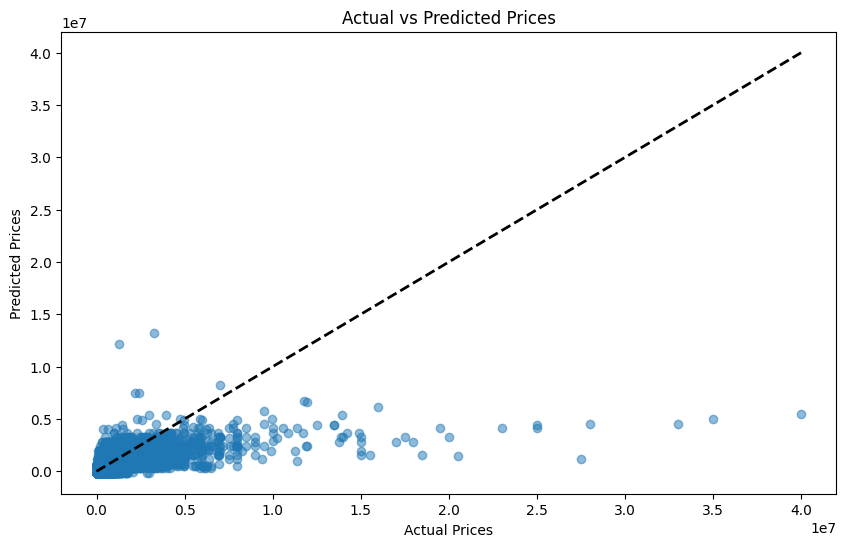

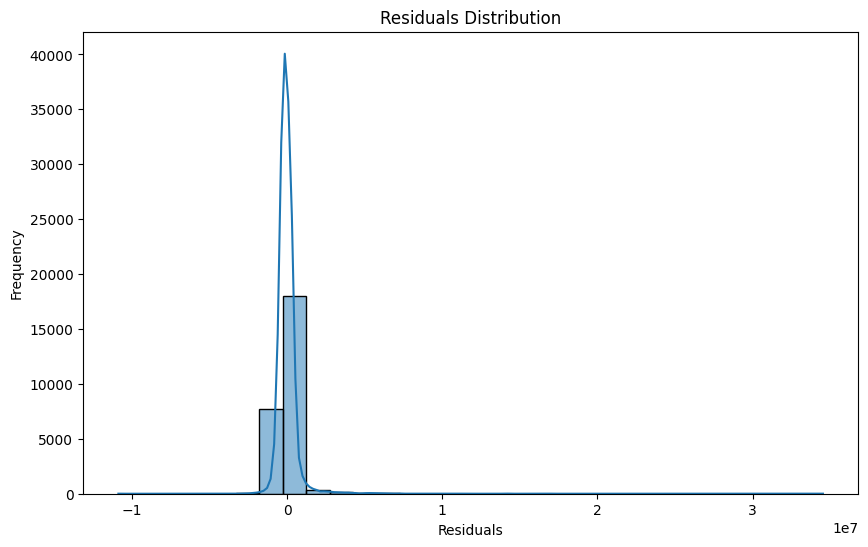

In [ ]:

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Plot Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()


In [ ]:
# Load the test dataset for submission
test_df = pd.read_csv("/content/task1.csv")

# Check for missing values in the test set
print(test_df.isnull().sum())

# Fill missing values in the same way as the training data
test_df['bed'] = test_df['bed'].fillna(test_df['bed'].mean())
test_df['bath'] = test_df['bath'].fillna(test_df['bath'].mean())
test_df['house_size'] = test_df['house_size'].fillna(test_df['house_size'].mean())

# Select the features for prediction
test_features = test_df[['house_size', 'bed', 'bath']]

# Predict on the test set
test_predictions = model.predict(test_features)


brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64


In [ ]:

# Prepare the submission file
submission = pd.DataFrame({
    'price': test_predictions
})
# Save the submission file
submission.to_csv("/content/submission.csv", index=False)